# A first trial on the Bach project
Jingmeng

## A simple RidgeClassifier model

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import TimeSeriesSplit

In [2]:
df = pd.read_csv("F.txt", sep="\t", header=None)
dfV1 = pd.DataFrame(df.iloc[:,0])
dfV1 = dfV1.rename(columns={0:"v1"})

In [3]:
dfV1

,v1
0,0
1,0
2,0
3,0
4,0
...,...
3819,0
3820,0
3821,0
3822,0


In [55]:
for i in range(1,101):
    dfV1["v1_lag"+str(i)] = dfV1.v1.shift(i).fillna(0).astype(int)

In [56]:
dfV1

,v1,v1_lag1,v1_lag2,v1_lag3,v1_lag4,v1_lag5,v1_lag6,v1_lag7,v1_lag8,v1_lag9,...,v1_lag91,v1_lag92,v1_lag93,v1_lag94,v1_lag95,v1_lag96,v1_lag97,v1_lag98,v1_lag99,v1_lag100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,0,0,0,0,0,0,0,0,0,0,...,69,71,71,69,69,68,68,0,0,0
3820,0,0,0,0,0,0,0,0,0,0,...,69,69,71,71,69,69,68,68,0,0
3821,0,0,0,0,0,0,0,0,0,0,...,68,69,69,71,71,69,69,68,68,0
3822,0,0,0,0,0,0,0,0,0,0,...,68,68,69,69,71,71,69,69,68,68


In [57]:
type(dfV1.at[4,"v1"])

numpy.int64

In [58]:
rc = RidgeClassifier()

In [59]:
rc.fit(X = dfV1[dfV1.columns.drop('v1')], y = dfV1.v1)

RidgeClassifier()

In [60]:
rc_pred = rc.predict(X = dfV1[dfV1.columns.drop('v1')])

In [61]:
sum(rc_pred)

195041

In [62]:
unique, counts = np.unique(rc_pred, return_counts=True)
d = {'unique':unique, 'counts':counts}  # pass the list to a dictionary
d = pd.DataFrame(d)

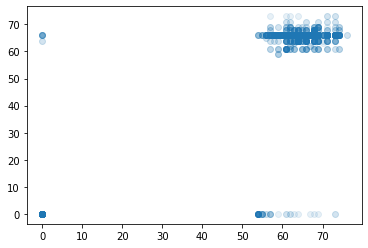

In [63]:
plt.scatter(dfV1.v1, rc_pred, alpha = 0.1)

In [69]:
cm = confusion_matrix(dfV1.v1, rc_pred)

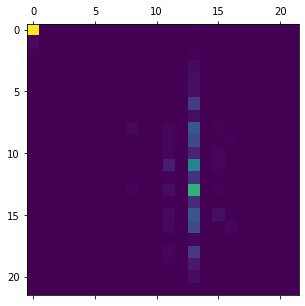

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.matshow(cm)

## CV to determine `alpha`
Then we probably need a RidgeClassifierCV to determine $\alpha$.
But then how to split time series data? No we don't need `TimeSeriesSplit` here. Just normal CV. 

In [71]:
rcv = RidgeClassifierCV(alphas = [1e-10, 1e-3, 0.001, 0.01, 0.1, 1.], cv = 10)

In [72]:
rcv.fit(X = dfV1[dfV1.columns.drop('v1')], y = dfV1.v1)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


RidgeClassifierCV(alphas=array([1.e-10, 1.e-03, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                  cv=10)

In [73]:
rcv.alpha_

1e-10

In [74]:
rcv_pred = rcv.predict(X = dfV1[dfV1.columns.drop('v1')])

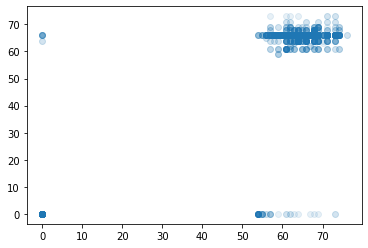

In [75]:
plt.scatter(dfV1.v1, rcv_pred, alpha=0.1)

CV selection for `alpha` didn't work well?

## Getting the possiblility

In [76]:
temp=rc.decision_function(X = dfV1[dfV1.columns.drop('v1')])

## Naive projection

In [77]:
dfV1

,v1,v1_lag1,v1_lag2,v1_lag3,v1_lag4,v1_lag5,v1_lag6,v1_lag7,v1_lag8,v1_lag9,...,v1_lag91,v1_lag92,v1_lag93,v1_lag94,v1_lag95,v1_lag96,v1_lag97,v1_lag98,v1_lag99,v1_lag100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,0,0,0,0,0,0,0,0,0,0,...,69,71,71,69,69,68,68,0,0,0
3820,0,0,0,0,0,0,0,0,0,0,...,69,69,71,71,69,69,68,68,0,0
3821,0,0,0,0,0,0,0,0,0,0,...,68,69,69,71,71,69,69,68,68,0
3822,0,0,0,0,0,0,0,0,0,0,...,68,68,69,69,71,71,69,69,68,68


In [170]:
dfV1_pred = dfV1.iloc[1:3780]
for i in range(100):
    temp_X = dfV1_pred[dfV1_pred.columns.drop('v1')].tail(1)
    temp_v1 = int(rc.predict(temp_X))
    temp_next_row = pd.DataFrame([temp_v1]+[int(dfV1_pred.v1.tail(1))]+temp_X.values.tolist()[0][0:-1]).T
    temp_next_row.columns = dfV1_pred.columns

    dfV1_pred = dfV1_pred.append(temp_next_row, ignore_index=True)

    

In [ ]:
dfV1_pred

,v1,v1_lag1,v1_lag2,v1_lag3,v1_lag4,v1_lag5,v1_lag6,v1_lag7,v1_lag8,v1_lag9,...,v1_lag91,v1_lag92,v1_lag93,v1_lag94,v1_lag95,v1_lag96,v1_lag97,v1_lag98,v1_lag99,v1_lag100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,66,66,66,66,66,66,66,66,66,66,...,63,66,68,68,66,66,66,66,66,69
3875,66,66,66,66,66,66,66,66,66,66,...,68,63,66,68,68,66,66,66,66,66
3876,66,66,66,66,66,66,66,66,66,66,...,68,68,63,66,68,68,66,66,66,66
3877,66,66,66,66,66,66,66,66,66,66,...,66,68,68,63,66,68,68,66,66,66


Now it's always `66`. So including probability information is a must.